In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings (action="ignore")

In [2]:
df = pd.read_csv("Bank-additional.csv", encoding=('ISO-8859-1'),low_memory=False)

In [27]:
#df.rename(columns={'y':'deposit'},inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [5]:
df.shape

(4119, 21)

In [6]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
column_names = df.columns  # Access column names using 'columns'

# Print the column names
print(column_names)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


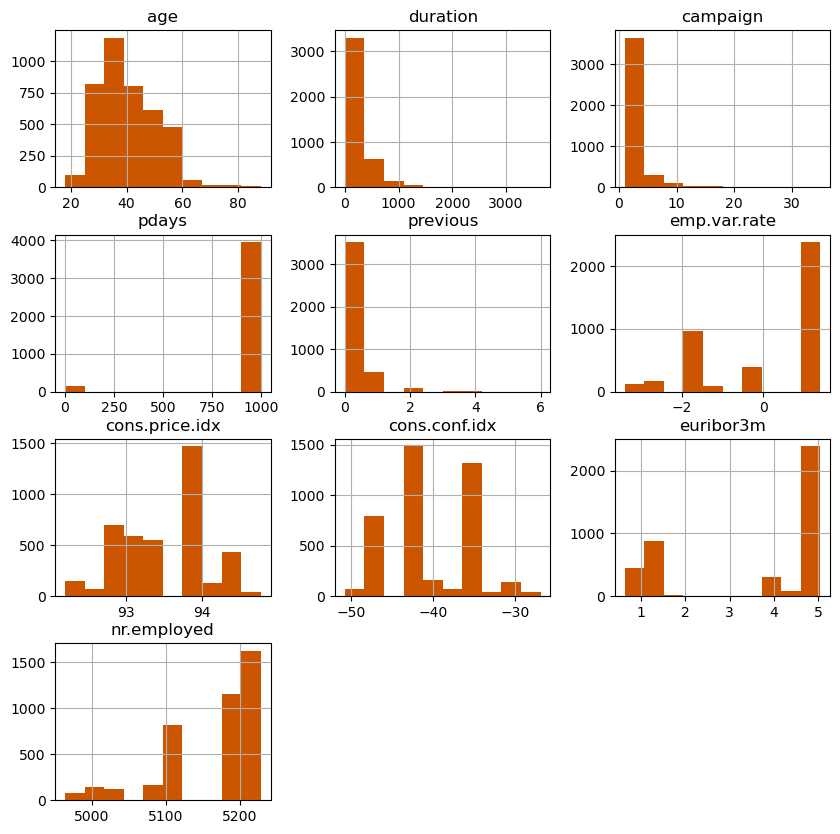

In [13]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()

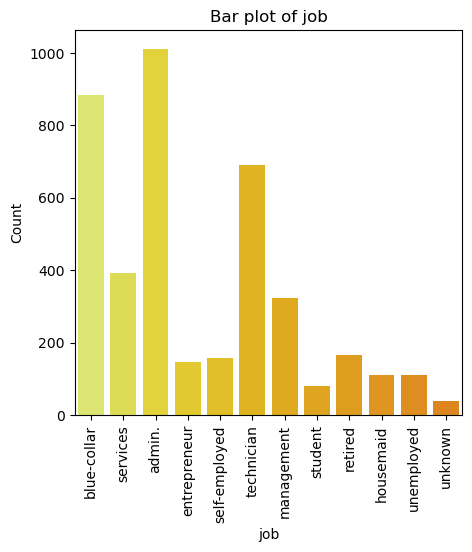

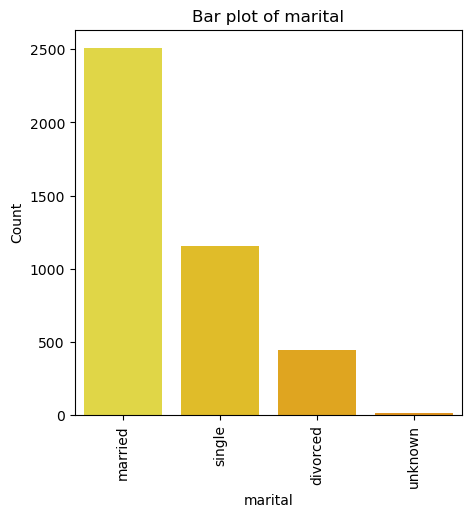

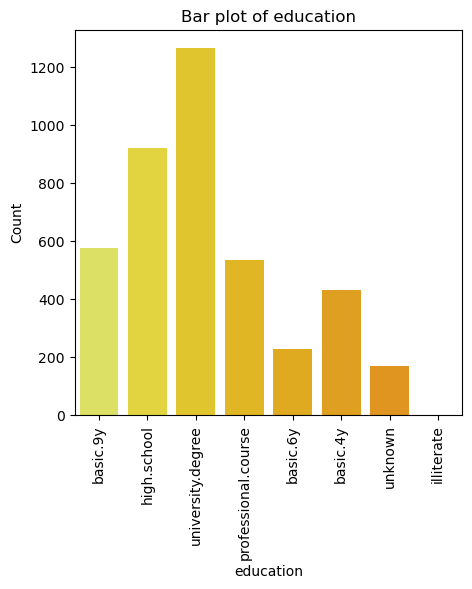

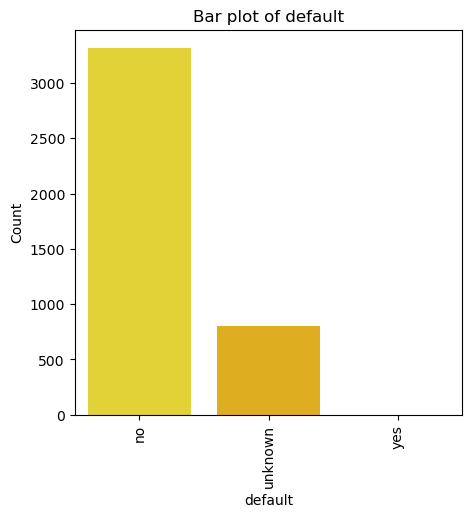

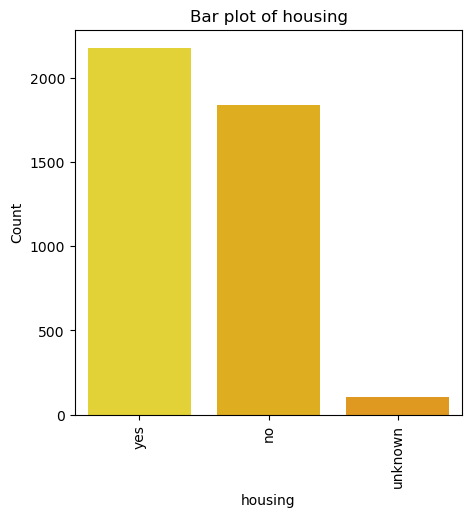

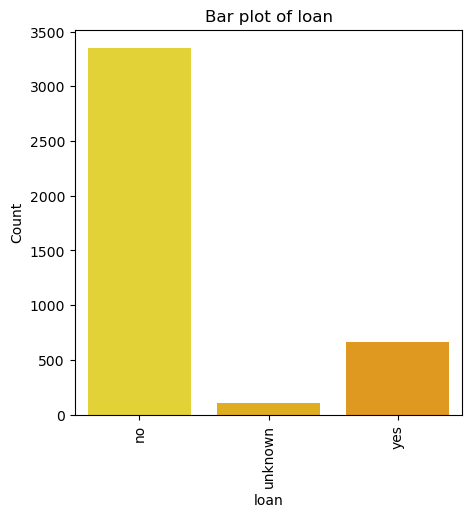

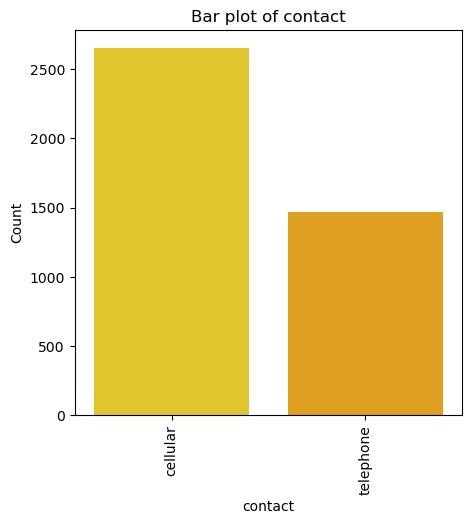

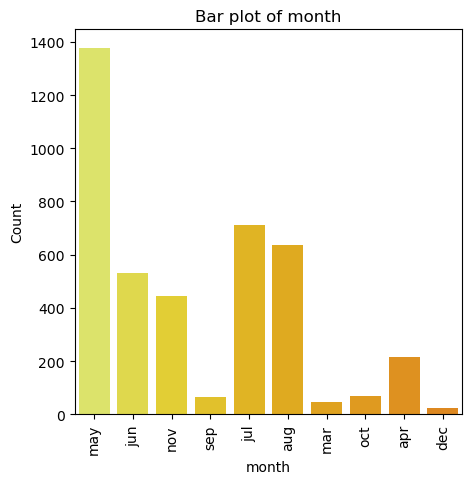

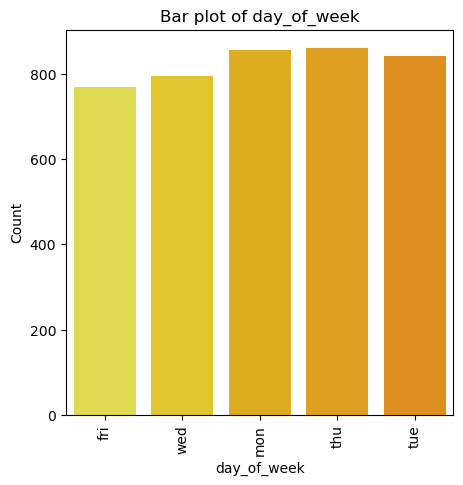

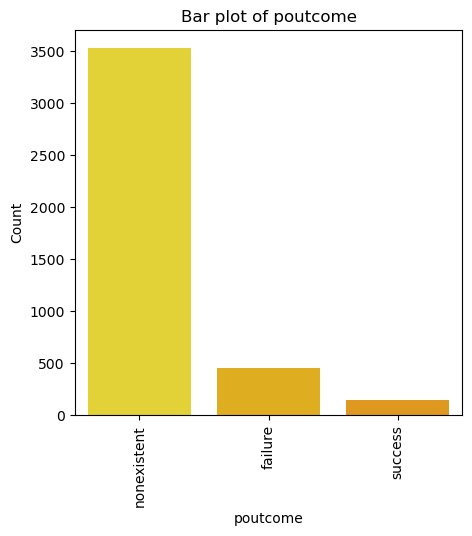

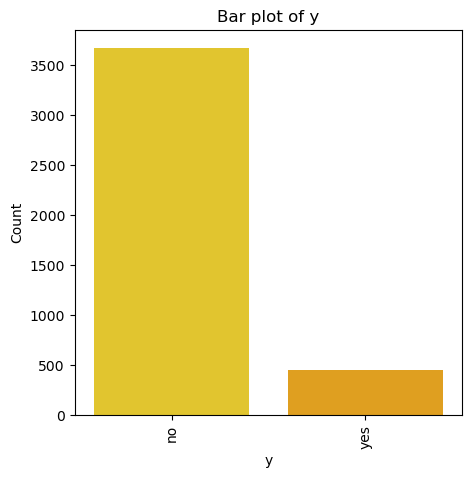

In [14]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature,data=df,palette='Wistia')
    plt.title(f'Bar plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

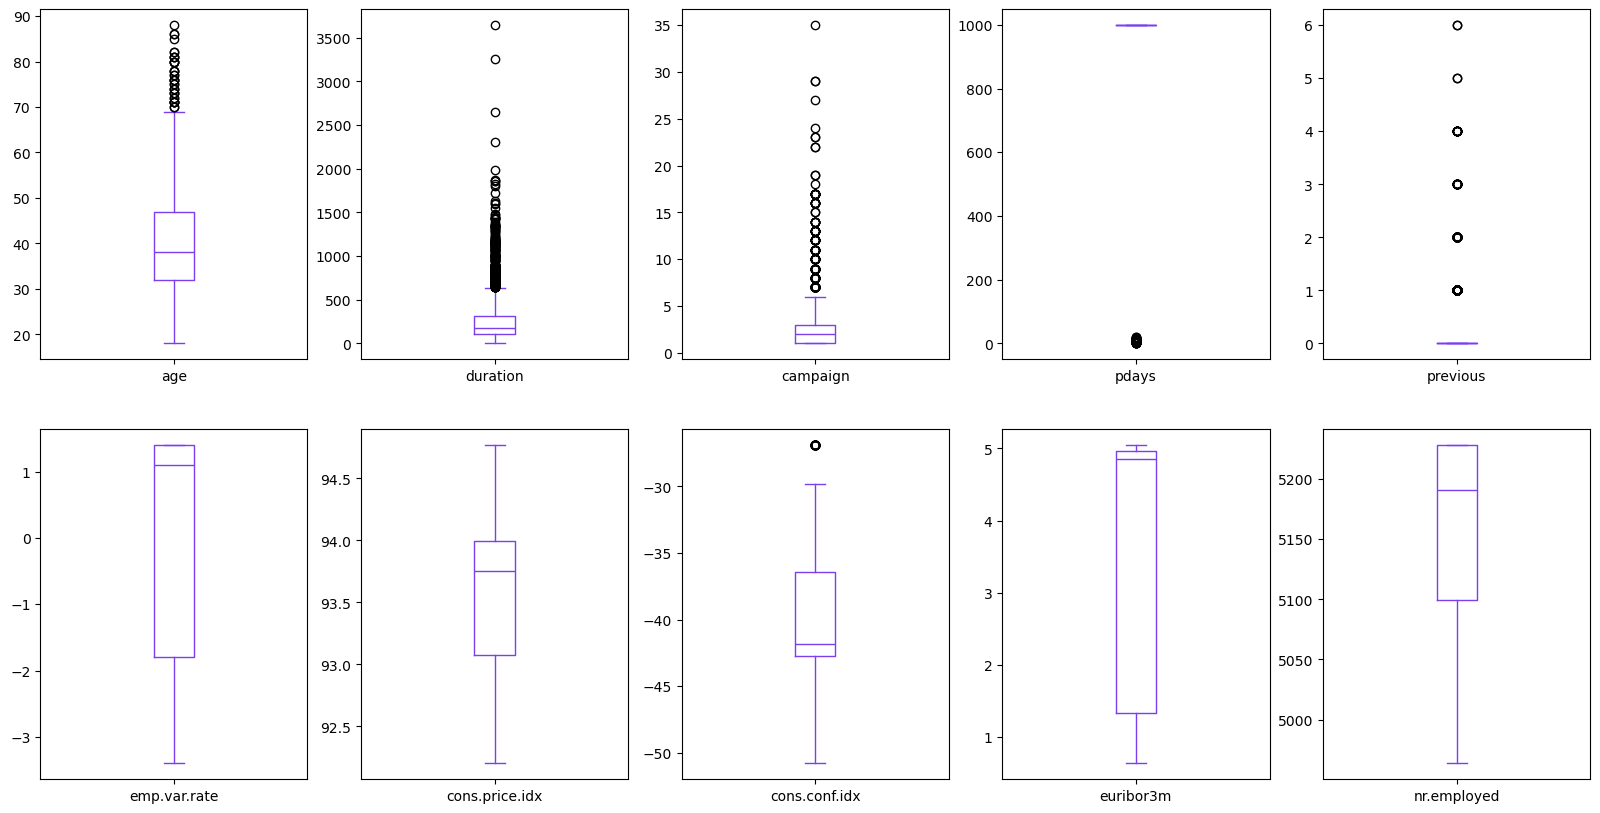

In [15]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#7b3fee')
plt.show()

In [16]:
column=df[['age','campaign','duration']]
q1=np.percentile(column,25)
q3=np.percentile(column,75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df[['age','campaign','duration']]=column[(column>lower_bound)&(column>lower_bound)]

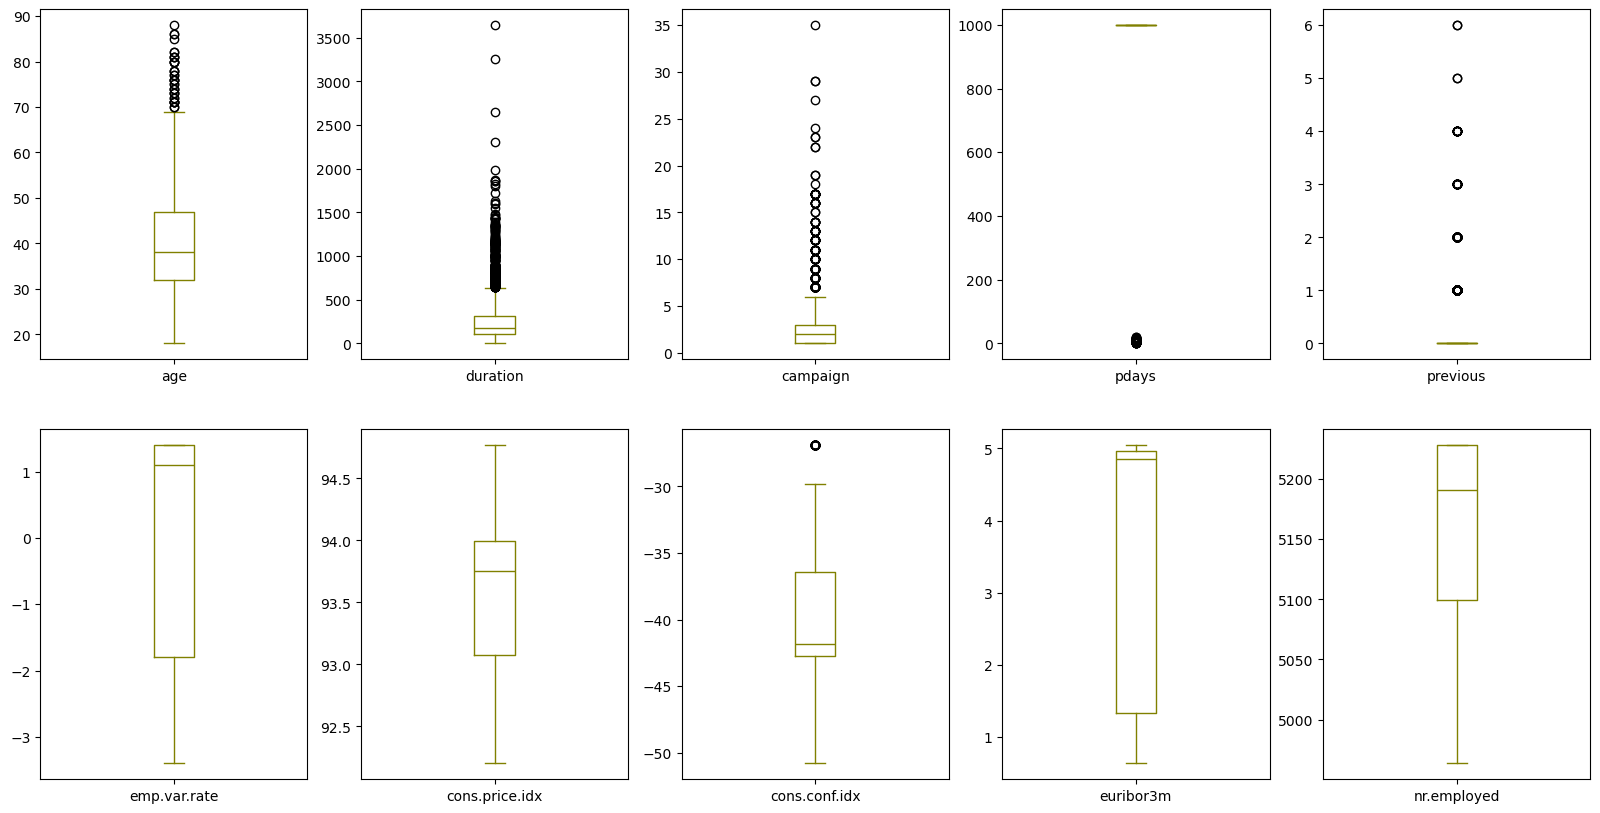

In [17]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

In [19]:
df = pd.read_csv("Bank-additional.csv", encoding=('ISO-8859-1'),low_memory=False)
corr=df.corr()
print(corr)
corr=cor[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

ValueError: could not convert string to float: 'blue-collar'

In [20]:
high_corr_cols=['emp.var.rate','euribor3m','nr.employed']

In [21]:
df1=df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [22]:
df1.drop(high_corr_cols,inplace=True,axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

In [23]:
df1.shape

(4119, 18)

In [24]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_encoded=df.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12,1,1,2,0,2,0,0,6,0,...,1,20,0,1,3,8,4,156,6,0
1,21,7,2,3,0,0,0,1,6,0,...,3,20,0,1,8,18,16,207,8,0
2,7,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,20,7,1,2,0,1,1,1,4,0,...,2,20,0,1,9,23,8,222,10,0
4,29,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,...,0,20,0,1,9,17,6,221,10,0
4115,21,0,1,3,0,2,0,1,3,0,...,0,20,0,1,9,17,6,222,10,0
4116,9,8,2,3,0,0,0,0,6,1,...,1,20,1,0,3,8,4,160,6,0
4117,40,0,1,3,0,0,0,0,1,0,...,0,20,0,1,9,13,17,229,10,0


In [30]:
df_encoded['y'].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [34]:
x=df_encoded.drop('y',axis=1)
w=df_encoded['y']
print(x.shape)
print(w.shape)
print(type(x))
print(type(w))

(4119, 20)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [32]:
df1.shape

(4119, 18)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  y               4119 non-null   o

In [35]:
from sklearn.model_selection import train_test_split
print(4119*0.25)

1029.75


In [36]:
x_train,x_test,w_train,w_test=train_test_split(x,w,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(w_train.shape)
print(w_test.shape)

(3089, 20)
(1030, 20)
(3089,)
(1030,)


In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def eval_model(w_test,w_pred):
    acc=accuracy_score(w_test,w_pred)
    print('Accuracy_score',acc)
    cm=confusion_matrix(w_test,w_pred)
    print('confusion Matrix\n',cm)
    print('classification Report\n',classification_report(w_test,w_pred))
def mscore(model):
    train_score=model.score(x_train,w_train)
    test_score=model.score(x_test,w_test)
    print('train_score',train_score)
    print('test_score',test_score)
    
    


In [55]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,w_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [54]:
mscore(dt)

train_score 0.9268371641307867
test_score 0.9135922330097087


In [61]:
wpred_dt=dt.predict(x_test)
print(wpred_dt)

[0 0 1 ... 0 0 0]


In [60]:
eval_model(w_test,wpred_dt)

Accuracy_score 0.9135922330097087
confusion Matrix
 [[896  34]
 [ 55  45]]
classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       930
           1       0.57      0.45      0.50       100

    accuracy                           0.91      1030
   macro avg       0.76      0.71      0.73      1030
weighted avg       0.91      0.91      0.91      1030



In [62]:
from sklearn.tree import plot_tree

In [64]:
cn=['yes','no']
fn=x.columns
print(cn)
print(fn)

['yes', 'no']
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


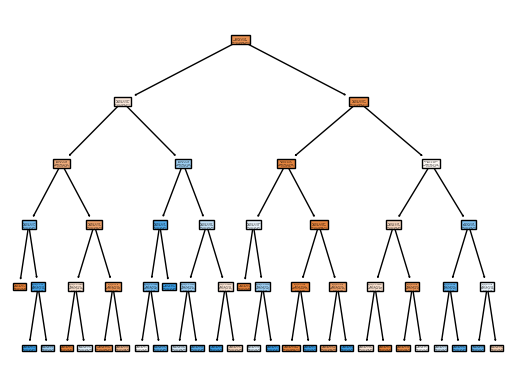

In [67]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt1= DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,w_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [69]:
mscore(dt1)

train_score 0.921333764972483
test_score 0.920388349514563


In [70]:
wpred_dt1=dt1.predict(x_test)

In [71]:
eval_model(w_test,wpred_dt1)

Accuracy_score 0.920388349514563
confusion Matrix
 [[909  21]
 [ 61  39]]
classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       930
           1       0.65      0.39      0.49       100

    accuracy                           0.92      1030
   macro avg       0.79      0.68      0.72      1030
weighted avg       0.91      0.92      0.91      1030



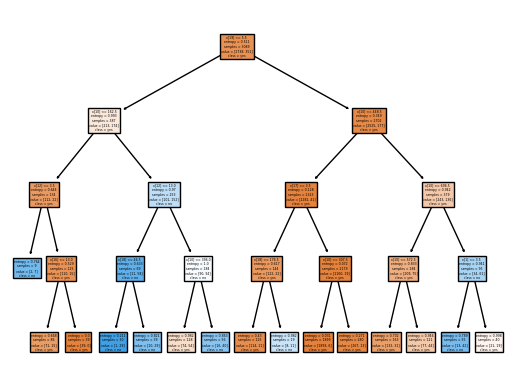

In [73]:
plt.figure()
plot_tree(dt1,class_names=cn,filled=True)
plt.show()